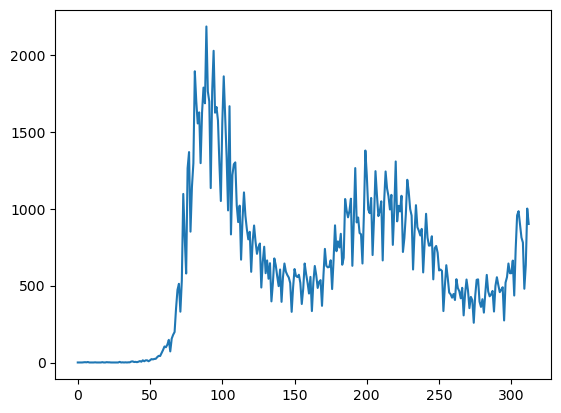

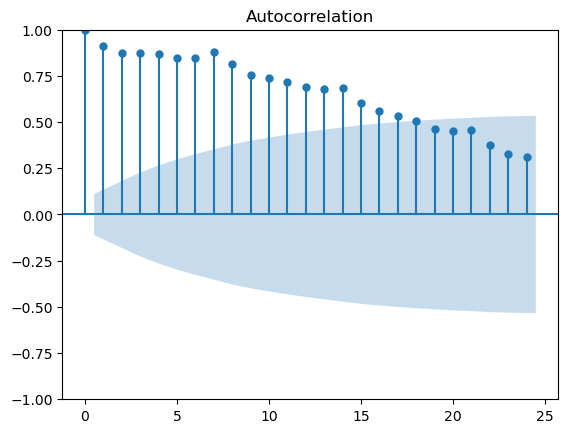

D:\88690\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


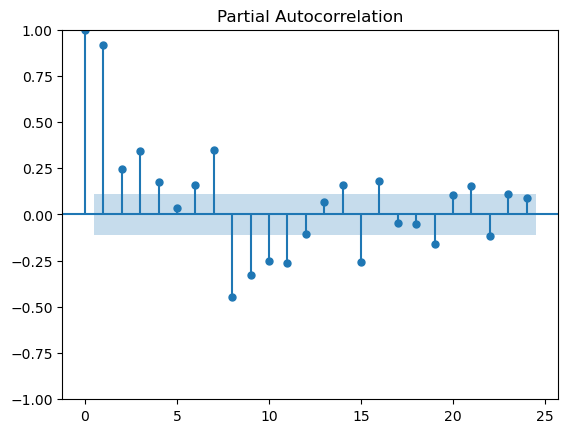

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# LSTM with regression framing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'各縣市每日確診資料\新竹市每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('Hsinchu_City.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('Hsinchu_City_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('Hsinchu_City_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'各縣市每日確診資料\新竹市每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        1
1        1
2        1
3        1
4        2
..     ...
309    480
310    634
311   1001
312    901
313    810

[314 rows x 1 columns]
314


## RNN結合LSTM架構

### Model1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
28/28 [==============================] - 11s 97ms/step - loss: 0.1107 - mse: 0.1107 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 2/1000
28/28 [==============================] - 0s 10ms/step - loss: 0.0613 - mse: 0.0613 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3/1000
28/28 [=============================

28/28 [==============================] - 0s 15ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 57/1000
28/28 [==============================] - 0s 11ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 58/1000
28/28 [==============================] - 0s 11ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 59/1000
28/28 [==============================] - 0s 12ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 60/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 61/1000
28/28 [==============================] - 0s 12ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 62/1000
28/28 [==============================] - 0s 15ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 63/1000
28/28 [==============================] - 0s 13ms/step - loss: 0

28/28 [==============================] - 0s 9ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 118/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 119/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 120/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 121/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 122/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 123/1000
28/28 [==============================] - 0s 11ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 124/1000
28/28 [==============================] - 0s 9ms/step - loss: 

28/28 [==============================] - 0s 10ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 179/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 180/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 181/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 182/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 183/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 184/1000
28/28 [==============================] - 0s 10ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 185/1000
28/28 [==============================] - 0s 9ms/step - loss:

28/28 [==============================] - 0s 10ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 240/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 241/1000
28/28 [==============================] - 0s 11ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 242/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 243/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 244/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 245/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 246/1000
28/28 [==============================] - 0s 9ms/step - loss:

28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 755/1000
28/28 [==============================] - 0s 10ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 756/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 757/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 758/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 759/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 760/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 761/1000
28/28 [==============================] - 0s 13ms/step - loss:

28/28 [==============================] - 0s 10ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 816/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 817/1000
28/28 [==============================] - 0s 13ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 818/1000
28/28 [==============================] - 0s 10ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 819/1000
28/28 [==============================] - 0s 10ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 820/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 821/1000
28/28 [==============================] - 0s 11ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 822/1000
28/28 [==============================] - 0s 9ms/step - lo

28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 877/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 878/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 879/1000
28/28 [==============================] - 0s 10ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 880/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 881/1000
28/28 [==============================] - 0s 13ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 882/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 883/1000
28/28 [==============================] - 0s 10ms/step - loss

28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 938/1000
28/28 [==============================] - 0s 10ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 939/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 940/1000
28/28 [==============================] - 0s 10ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 941/1000
28/28 [==============================] - 0s 11ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 942/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 943/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 944/1000
28/28 [==============================] - 0s 10ms/step - los

28/28 [==============================] - 0s 12ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 999/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 1000/1000
1/1 [==============================] - 0s 57ms/step
[[   4.3301854]
 [   4.3301854]
 [   4.3301854]
 [   4.3301854]
 [   5.401484 ]
 [   6.4728613]
 [   5.401484 ]
 [   7.544284 ]
 [   4.3301854]
 [   4.3301854]
 [   4.3301854]
 [   4.3301854]
 [   5.401484 ]
 [   4.3301854]
 [   4.3301854]
 [   4.3301854]
 [   4.3301854]
 [   6.4728613]
 [   4.3301854]
 [   4.3301854]
 [   6.4728613]
 [   5.401484 ]
 [   5.401484 ]
 [   4.3301854]
 [   4.3301854]
 [   4.3301854]
 [   4.3301854]
 [   4.3301854]
 [   4.3301854]
 [   8.61581  ]
 [   4.3301935]
 [   5.401484 ]
 [   4.3301854]
 [   5.401484 ]
 [   4.3301854]
 [   5.401484 ]
 [   5.401484 ]
 [  10.759069 ]
 [  11.830802 ]
 [   7.544284 ]
 [   8.61581  ]
 [   6.4728613]
 [   9

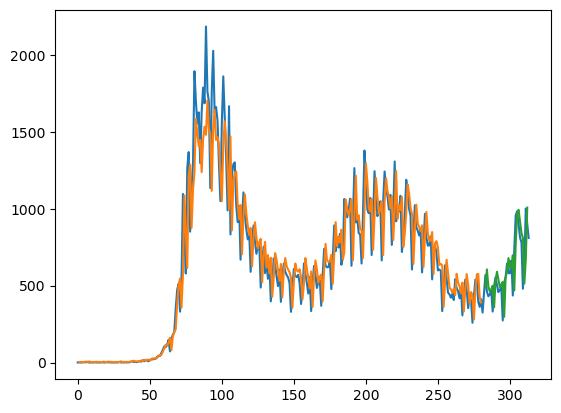

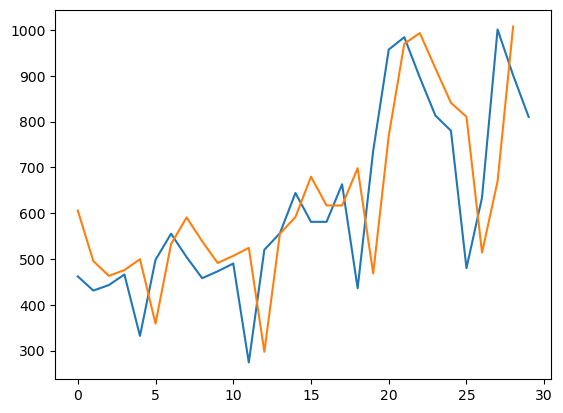

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    LSTM(64, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="hsinchuCity_rnn+lstm_1000_1.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('hsinchuCity_rnn+lstm_1000_1.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#看裡面的值是否合理、資料結構的dim
print(trainPredict,trainY)
print(testPredict,testY)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('hsinchuCity_rnn+lstm_1000_plot_1.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("hsinchuCity_rnn+lstm_1000_predict&real_1.png")
plt.show()

### Model2

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 1, 128)            16640     
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 148,353
Trainable params: 148,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
28/28 [==============================] - 7s 59ms/step - loss: 0.1032 - mse: 0.1032 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 2/1000
28/28 [==============================] - 0s 13ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 3/1000
28/28 [==========================

28/28 [==============================] - 0s 11ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 57/1000
28/28 [==============================] - 0s 12ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 58/1000
28/28 [==============================] - 0s 14ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 59/1000
28/28 [==============================] - 0s 13ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 60/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 61/1000
28/28 [==============================] - 0s 12ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 62/1000
28/28 [==============================] - 0s 15ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 63/1000
28/28 [==============================] - 0s 12ms/step - loss: 0

28/28 [==============================] - 0s 7ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 118/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 119/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 120/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 121/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 122/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 123/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 124/1000
28/28 [==============================] - 0s 7ms/step - loss: 0

28/28 [==============================] - 0s 7ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 179/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 180/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 181/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 182/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 183/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 184/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 185/1000
28/28 [==============================] - 0s 6ms/step - loss: 0

28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 240/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 241/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 242/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 243/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 244/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 245/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 246/1000
28/28 [==============================] - 0s 7ms/step - loss: 0

28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 301/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 302/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 303/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 304/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 305/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 306/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 307/1000
28/28 [==============================] - 0s 7ms/step - loss: 0

28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 362/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 363/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 364/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 365/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 366/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 367/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 368/1000
28/28 [==============================] - 0s 7ms/step - loss: 0

28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 423/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 424/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 425/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 426/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 427/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 428/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 429/1000
28/28 [==============================] - 0s 7ms/step - loss: 0

28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 484/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 485/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 486/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 487/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 488/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 489/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 490/1000
28/28 [==============================] - 0s 6ms/step - loss: 0

28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 545/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 546/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 547/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 548/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 549/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 550/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 551/1000
28/28 [==============================] - 0s 6ms/step - loss: 0

28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 606/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 607/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 608/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 609/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 610/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 611/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 612/1000
28/28 [==============================] - 0s 6ms/step - loss: 0

28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 667/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 668/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 669/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 670/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 671/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 672/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 673/1000
28/28 [==============================] - 0s 8ms/step - loss: 0

28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 728/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 729/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 730/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 731/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 732/1000
28/28 [==============================] - 0s 10ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 733/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 734/1000
28/28 [==============================] - 0s 7ms/step - loss: 

28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 789/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 790/1000
28/28 [==============================] - 0s 11ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 791/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 792/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 793/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 794/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 795/1000
28/28 [==============================] - 0s 7ms/step - loss: 

28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 850/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 851/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 852/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 853/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 854/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 855/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 856/1000
28/28 [==============================] - 0s 7ms/step - loss: 0

28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 911/1000
28/28 [==============================] - 0s 10ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 912/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 913/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 914/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 915/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 916/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 917/1000
28/28 [==============================] - 0s 7ms/step - loss: 

28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 972/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 973/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 974/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 975/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 976/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 977/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 978/1000
28/28 [==============================] - 0s 7ms/step - loss: 0

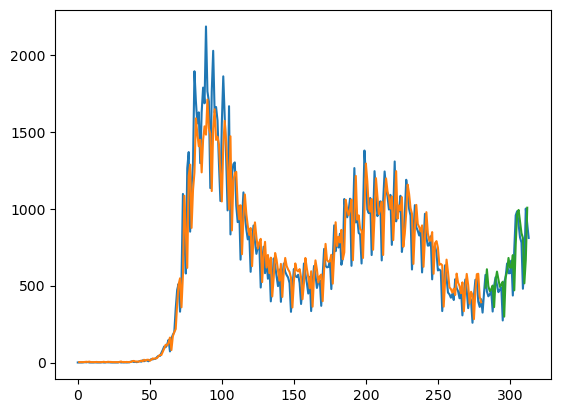

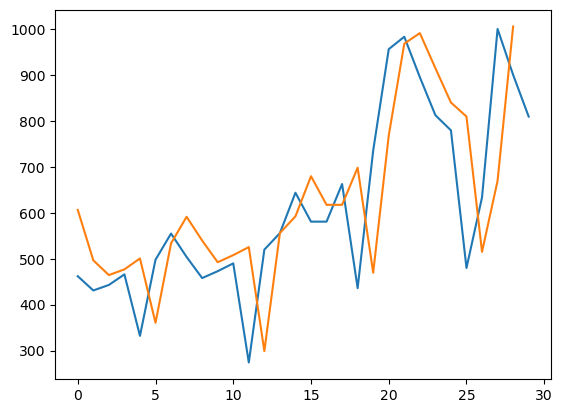

In [10]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(1, look_back)),
    LSTM(128, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="hsinchuCity_rnn+lstm_1000_2.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('hsinchuCity_rnn+lstm_1000_2.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('hsinchuCity_rnn+lstm_1000_plot_2.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("hsinchuCity_rnn+lstm_1000_predict&real_2.png")
plt.show()

### Model3

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 1, 64)             4224      
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 1, 64)             8256      
                                                                 
 dense_16 (Dense)            (None, 1, 64)             4160      
                                                                 
 lstm_12 (LSTM)              (None, 1, 64)             33024     
                                                                 
 lstm_13 (LSTM)              (None, 64)                33024     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 82,753
Trainable params: 82,753
Non-trai

28/28 [==============================] - 0s 8ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 54/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 55/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 56/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 57/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 58/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 59/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 60/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0083 -

28/28 [==============================] - 0s 8ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 115/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 116/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 117/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 118/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 119/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 120/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 121/1000
28/28 [==============================] - 0s 8ms/step - loss: 0

28/28 [==============================] - 0s 8ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 176/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 177/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 178/1000
28/28 [==============================] - 0s 10ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 179/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 180/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 181/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 182/1000
28/28 [==============================] - 0s 7ms/step - loss: 

28/28 [==============================] - 0s 8ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 237/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 238/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 239/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 240/1000
28/28 [==============================] - 0s 18ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 241/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 242/1000
28/28 [==============================] - 0s 17ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 243/1000
28/28 [==============================] - 0s 8ms/step - loss:

28/28 [==============================] - 0s 13ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 298/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 299/1000
28/28 [==============================] - 0s 11ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 300/1000
28/28 [==============================] - 0s 15ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 301/1000
28/28 [==============================] - 0s 12ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 302/1000
28/28 [==============================] - 0s 11ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 303/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 304/1000
28/28 [==============================] - 0s 9ms/step - lo

28/28 [==============================] - 0s 8ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 359/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 360/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 361/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 362/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 363/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 364/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 365/1000
28/28 [==============================] - 0s 13ms/step - loss: 

28/28 [==============================] - 0s 8ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 420/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 421/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 422/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 423/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 424/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 425/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 426/1000
28/28 [==============================] - 0s 9ms/step - loss: 0

28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 481/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 482/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 483/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 484/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 485/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 486/1000
28/28 [==============================] - 0s 12ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 487/1000
28/28 [==============================] - 0s 8ms/step - loss: 

28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 542/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 543/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 544/1000
28/28 [==============================] - 0s 10ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 545/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 546/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 547/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 548/1000
28/28 [==============================] - 0s 8ms/step - loss: 

28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 603/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 604/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 605/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 606/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 607/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 608/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 609/1000
28/28 [==============================] - 0s 8ms/step - loss: 0

28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 664/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 665/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 666/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 667/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 668/1000
28/28 [==============================] - 0s 12ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 669/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 670/1000
28/28 [==============================] - 0s 8ms/step - loss: 

28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 725/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 726/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 727/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 728/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 729/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 730/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 731/1000
28/28 [==============================] - 0s 8ms/step - loss: 0

28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 786/1000
28/28 [==============================] - 0s 10ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 787/1000
28/28 [==============================] - 0s 11ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 788/1000
28/28 [==============================] - 0s 11ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 789/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 790/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 791/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 792/1000
28/28 [==============================] - 0s 9ms/step - loss

28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 847/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 848/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 849/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 850/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 851/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 852/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 853/1000
28/28 [==============================] - 0s 8ms/step - loss: 0

28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 908/1000
28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 909/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 910/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 911/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 912/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 913/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 914/1000
28/28 [==============================] - 0s 8ms/step - loss: 0

28/28 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 969/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 970/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 971/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 972/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 973/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 974/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 975/1000
28/28 [==============================] - 0s 8ms/step - loss: 0

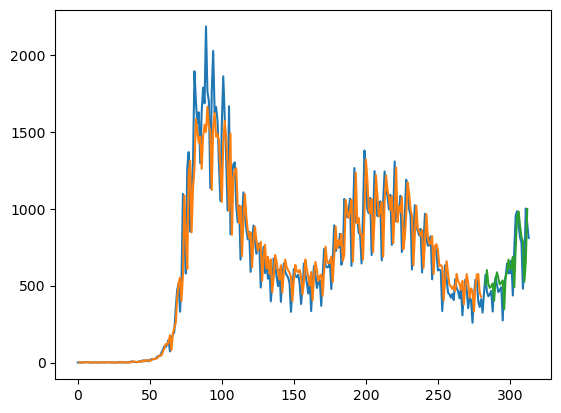

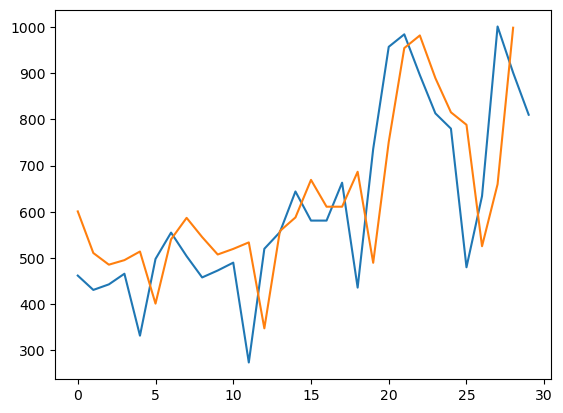

In [11]:
from tensorflow.keras.layers import Flatten,Reshape
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    SimpleRNN(64, return_sequences=True, activation='selu'),
    Dense(64, activation='selu'),
    LSTM(64, return_sequences=True, activation='selu'),
    LSTM(64, return_sequences=False, activation='selu'),
    Dense(1, activation='tanh')
])

model.output_shape
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="hsinchuCity_rnn+lstm_1000_3.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('hsinchuCity_rnn+lstm_1000_3.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('hsinchuCity_rnn+lstm_1000_plot_3.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("hsinchuCity_rnn+lstm_1000_predict&real_3.png")
plt.show()

### Model4

280/280 [==============================] - 19s 18ms/step - loss: 0.0573 - mse: 0.0573 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 2/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0490 - mse: 0.0490 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 3/1000
280/280 [==============================] - 2s 7ms/step - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 4/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0489 - mse: 0.0489 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 5/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 6/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0490 - mse: 0.0490 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 7/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0490 - mse: 0.0490 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 8/1000
280/280 [==============================] - 2s 6ms/step - los

Epoch 118/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 119/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 120/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 121/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 122/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 123/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 124/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 125/1000
280/280 [========================

280/280 [==============================] - 2s 6ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 269/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 270/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 271/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 272/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 273/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 274/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 275/1000
280/280 [==============================] - 2s 6m

280/280 [==============================] - 2s 6ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 432/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 433/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 434/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 435/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 436/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 437/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 438/1000
280/280 [==============================] - 2s 6m

280/280 [==============================] - 2s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 492/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 493/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 494/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 495/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 496/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 497/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 498/1000
280/280 [==============================] - 2s 6m

280/280 [==============================] - 2s 6ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 552/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 553/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 554/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 555/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 556/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 557/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 558/1000
280/280 [==============================] - 2s 6m

280/280 [==============================] - 1s 5ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 673/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 674/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 675/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 676/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 677/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 678/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 679/1000
280/280 [==============================] - 1s 5m

280/280 [==============================] - 1s 5ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 733/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 734/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 735/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 736/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 737/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 738/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 739/1000
280/280 [==============================] - 1s 5m

280/280 [==============================] - 1s 5ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 793/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 794/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 795/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 796/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 797/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 798/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 799/1000
280/280 [==============================] - 1s 5m

280/280 [==============================] - 2s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 853/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 854/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 855/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 856/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 857/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 858/1000
280/280 [==============================] - 2s 7ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 859/1000
280/280 [==============================] - 2s 7m

280/280 [==============================] - 2s 6ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 913/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 914/1000
280/280 [==============================] - 2s 7ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 915/1000
280/280 [==============================] - 2s 7ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 916/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 917/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 918/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 919/1000
280/280 [==============================] - 2s 6m

280/280 [==============================] - 2s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 973/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 974/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 975/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 976/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 977/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 978/1000
280/280 [==============================] - 2s 7ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 979/1000
280/280 [==============================] - 2s 6m

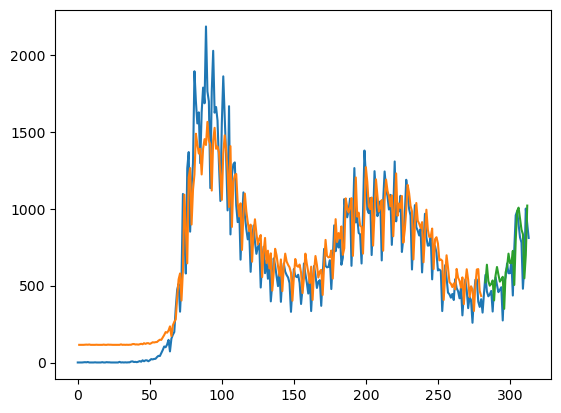

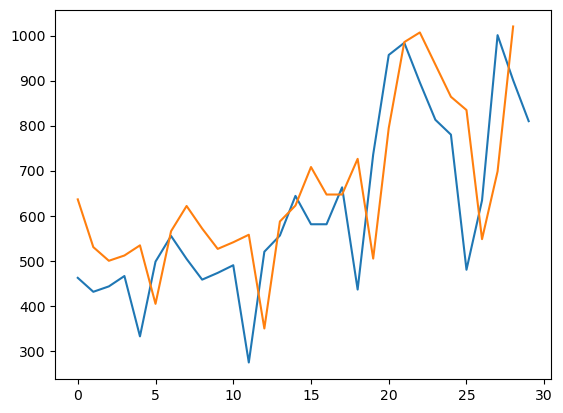

In [9]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='elu'),
    SimpleRNN(64,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='elu'),
    Dense(4, activation='elu'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="hsinchuCity_rnn+lstm_1000_4.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=1, verbose=1,callbacks=[model_checkpoint_callback])
model.save('hsinchuCity_rnn+lstm_1000_4.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('hsinchuCity_rnn+lstm_1000_plot_4.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("hsinchuCity_rnn+lstm_1000_predict&real_4.png")
plt.show()